# <center> TechGig Machine Learning - Online Hackathon</center>

## <center>Round 2 - Phishing Detection</center>

As each coin has two sides, so does technology. On one hand, with the advancement in technology the lives are getting better, on the other hand, the ill use of technology is also increasing. The suspicious activities are increasing ranging from dos attacks, phishing, hacking etc. In this hackathon, we are concerned with the increasing phishing attacks.


Typically, Phishing is a type of social engineering where an attacker sends a fraudulent (e.g., spoofed, fake, or otherwise deceptive) message designed to trick a person into revealing sensitive information to the attacker or to deploy malicious software on the victim's infrastructure like ransomware.

The task in this problem is to create a model that can predict/identify whether a website is legitimate or a phishing website.

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [2]:
# loading train data
train = pd.read_csv('Phising_Training_Dataset.csv')
train.head()

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,12344,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,12345,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,12346,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,12347,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,12348,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [3]:
train.isnull().sum() # check for missing data

key                            0
having_IP                      0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

The dataset contains no missing data.

In [4]:
# loading sample and test data
sample = pd.read_csv('Phising_Sample_Submisson.csv')
test = pd.read_csv('Phising_Testing_Dataset.csv')

'Key' not required for training

In [5]:
train = train.drop('key', axis=1) # dropping key

Result Interpretation:

#### * 1 represents the 'legitimate'

#### * 0 represents 'suspicious'

#### * -1 represents 'phishing'

In [6]:
print('Number of Features in train data:', train.shape[1])
print('Number of Rows in train data:', train.shape[0])

Number of Features in train data: 31
Number of Rows in train data: 8955


In [7]:
feature_names = list(train.drop('Result', axis=1).columns.values) # storing all feature names

In [8]:
color_palette = {-1:'#FF0000', 0:'#FFA500', 1:'#008000'} # Associating a color to each result category

Plotting a countplot of all features. This will give us an idea about which all features are most responsible for a site being malicious, suspicious or legitimate.

* Legitimate -> color Green (safe)
* Suspicious -> Color Orange(Potential Danger)
* Phishing -> Color Red (danger)

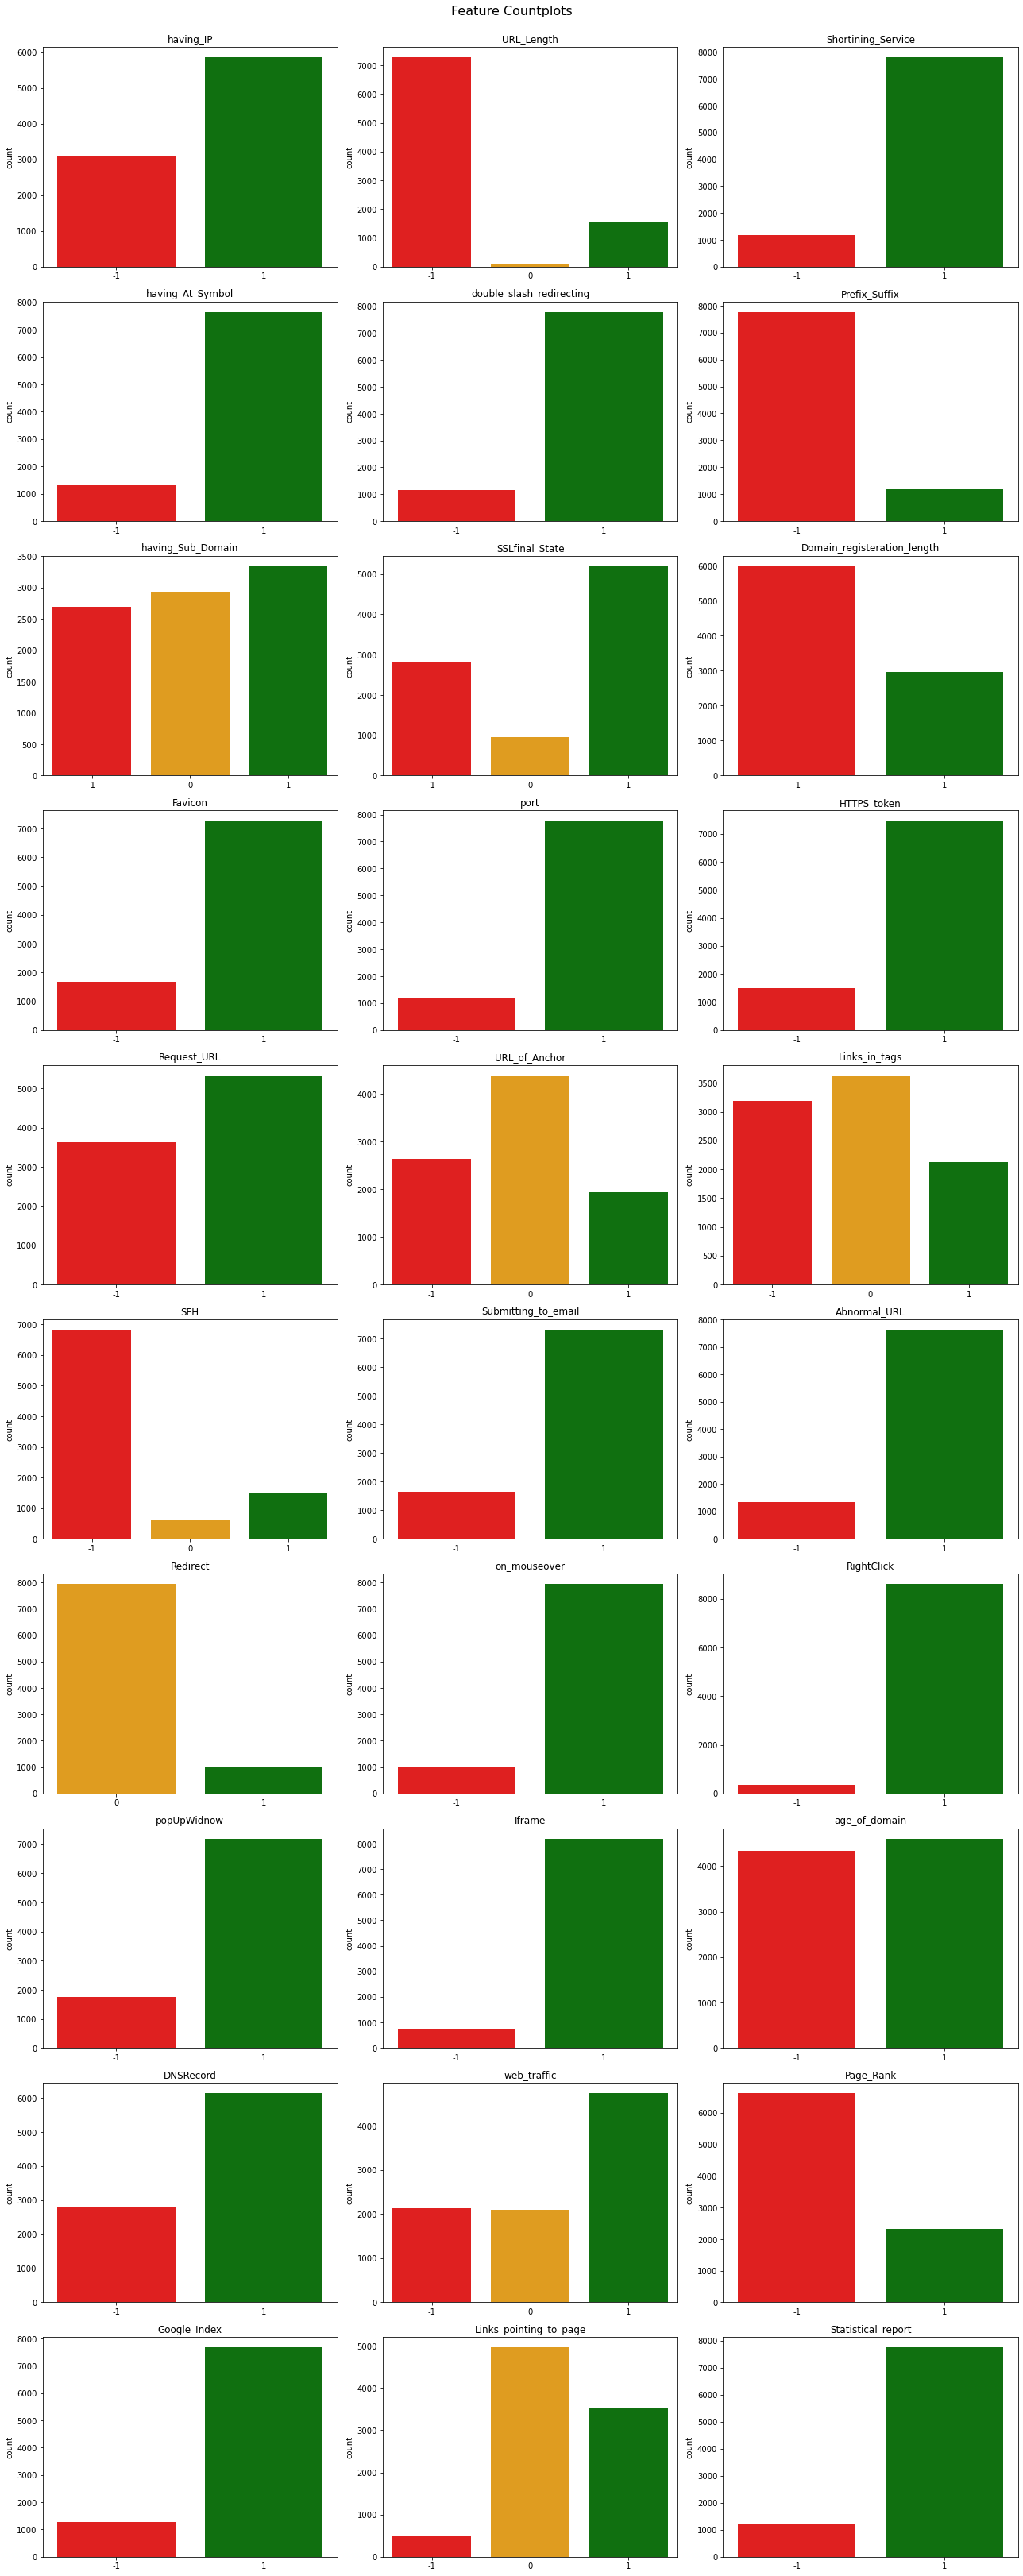

In [9]:
fig = plt.figure(figsize = (18,45))

c = 1
for col in feature_names:
    fig.add_subplot(10,3,c)
    sns.countplot(train[col], palette=color_palette)
    plt.title(col)
    plt.xlabel(None)
    c += 1
fig.suptitle('Feature Countplots', y = 1, fontsize = 16)
plt.tight_layout()

* From the countplot it can be observed that the features such as URL_length, Prefix_Suffix, SFH contribute highly towards a site being malicious.
* Shortining_Service, having_At_Symbol, double_slash_redirecting, HTTPS_Token, port, Favicon, submitting_to_email, Abnormal_URL, on_mouseover, RightClick, Iframe, popUpWindow, Google_Index, Statistical_report are the features that contribute highly to a site being legitimate.

Dataset is interpretable and looks promising. Therefore, training simple models might produce very good results.

## Label Distribution

<AxesSubplot:xlabel='Result', ylabel='count'>

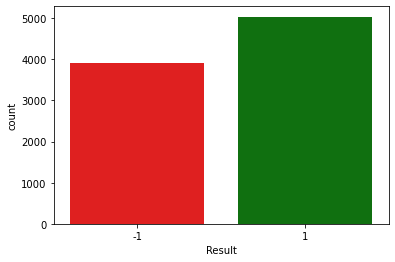

In [10]:
sns.countplot(train['Result'], palette=color_palette)

The labels in the result are fairly balanced. Therefore, accuracy, f1-score or a confusion matrix can be used as an evaluation metric.

### Splitting Data for Training and Validation

In [11]:
X = train.drop('Result', axis = 1)
y = train['Result']

In [12]:
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)

In [13]:
X_train.shape, X_cv.shape

((7164, 30), (1791, 30))

In [14]:
def Evaluate(tr_true, tr_pred, cv_true, cv_pred):
    '''Function to evaluate the results produced after training a model'''
    
    # plotting confusion matrices (cm)
    fig = plt.figure(figsize=(15, 5))
    # train cm
    fig.add_subplot(1,2,1)
    plt.title('Train Predictions')
    sns.heatmap(confusion_matrix(tr_true, tr_pred), cmap= 'Reds', annot = True)
    x = plt.xticks(ticks = [0.5,1.5], labels = ['Phishing', 'Legitimate'])
    y = plt.yticks(ticks = [0.5,1.5], labels = ['Phishing', 'Legitimate'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    
    # CV cm
    fig.add_subplot(1,2,2)
    plt.title('CV Predictions')
    sns.heatmap(confusion_matrix(cv_true, cv_pred), cmap= 'Reds', annot = True)
    x = plt.xticks(ticks = [0.5,1.5], labels = ['Phishing', 'Legitimate'])
    y = plt.yticks(ticks = [0.5,1.5], labels = ['Phishing', 'Legitimate'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    plt.tight_layout()
    
    print('Train Set Accuracy: ', np.round(accuracy_score(tr_true, tr_pred),2)*100, "%")
    print('Train Set F1 Score: ', np.round(f1_score(tr_true, tr_pred),2))
    print('\n')
    print('CV Set Accuracy: ', np.round(accuracy_score(cv_true, cv_pred),2)*100, "%")
    print('CV Set F1 Score: ', np.round(f1_score(cv_true, cv_pred),2))

# <center>Model Training</center>

## 1. Logistic Regression

In [15]:
# training
lr = SGDClassifier(loss='log', n_jobs=-1)
lr.fit(X_train, y_train)

SGDClassifier(loss='log', n_jobs=-1)

In [16]:
# predicting
lr_pred_cv = lr.predict(X_cv)
lr_pred_train = lr.predict(X_train)

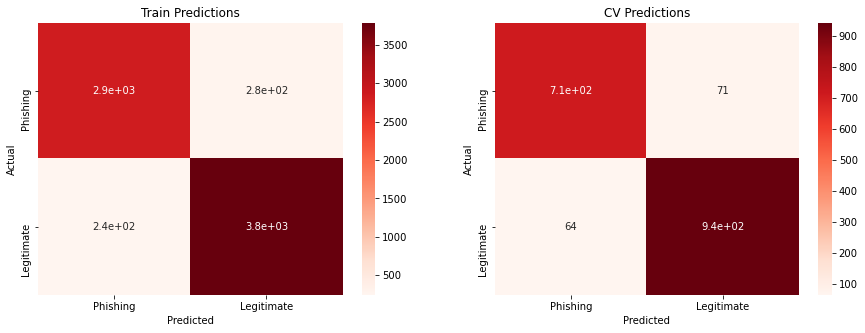

Train Set Accuracy:  93.0 %
Train Set F1 Score:  0.93


CV Set Accuracy:  92.0 %
CV Set F1 Score:  0.93


<Figure size 432x288 with 0 Axes>

In [17]:
# evaluating
Evaluate(y_train, lr_pred_train, y_cv, lr_pred_cv)

In [18]:
y_train.value_counts()

 1    4027
-1    3137
Name: Result, dtype: int64

In [19]:
2.8e+03 + 1.6e+02

2960.0

## 2. SVC

In [20]:
# training
svc = SGDClassifier(loss='hinge')
svc.fit(X_train, y_train)

SGDClassifier()

In [21]:
# predicting
svc_pred_cv = svc.predict(X_cv)
svc_pred_train = svc.predict(X_train)

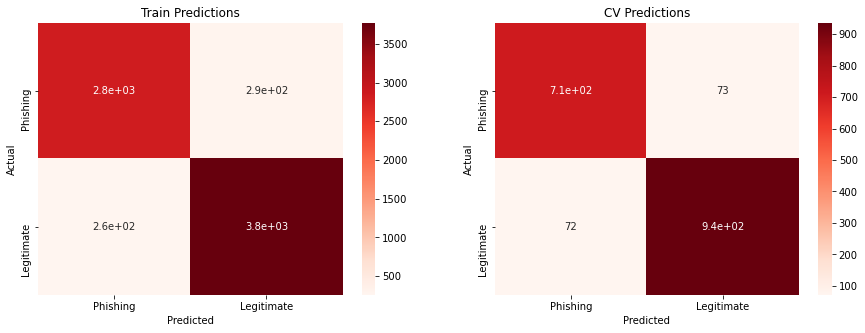

Train Set Accuracy:  92.0 %
Train Set F1 Score:  0.93


CV Set Accuracy:  92.0 %
CV Set F1 Score:  0.93


<Figure size 432x288 with 0 Axes>

In [22]:
# evaluating
Evaluate(y_train, svc_pred_train, y_cv, svc_pred_cv)

## 3. Random Forest

In [23]:
# training
rf = RandomForestClassifier(n_estimators=100, n_jobs = -1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [24]:
# predicting
rf_pred_cv = rf.predict(X_cv)
rf_pred_train = rf.predict(X_train)

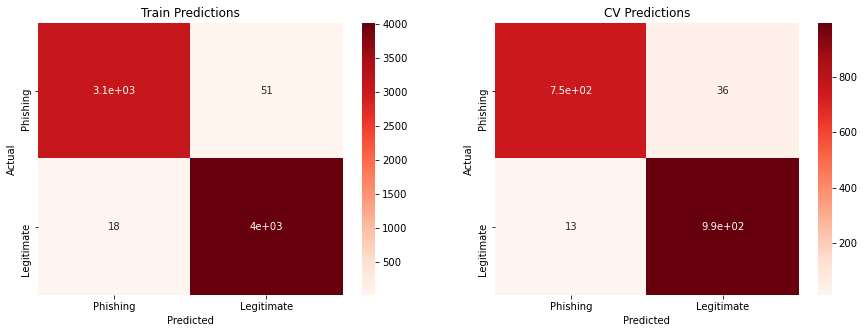

Train Set Accuracy:  99.0 %
Train Set F1 Score:  0.99


CV Set Accuracy:  97.0 %
CV Set F1 Score:  0.98


<Figure size 432x288 with 0 Axes>

In [25]:
# evaluating
Evaluate(y_train, rf_pred_train, y_cv, rf_pred_cv)

## 4.GBDT

In [26]:
# training
gbdt = xgb.XGBClassifier(n_estimators = 200, n_jobs=-1)
gbdt.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [27]:
# predicting
gbdt_pred_cv = gbdt.predict(X_cv)
gbdt_pred_train = gbdt.predict(X_train)

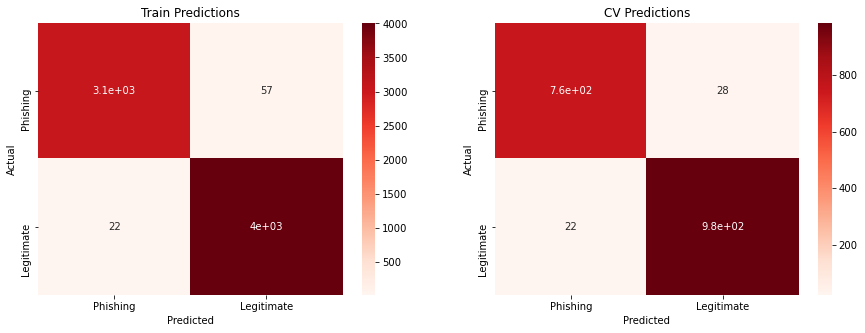

Train Set Accuracy:  99.0 %
Train Set F1 Score:  0.99


CV Set Accuracy:  97.0 %
CV Set F1 Score:  0.98


<Figure size 432x288 with 0 Axes>

In [28]:
# evaluating
Evaluate(y_train, gbdt_pred_train, y_cv, gbdt_pred_cv)

All the models are producing very good results. There is no case of overfitting or underfitting for any of the models. Ensemble models are producing better results than a logistic regression or SVM model. As seen from the confusion matrix of GBDT, it looks the most promising model. Therefore, GBDT predictions are used for the final test predictions.

### Test predictions using GBDT

In [29]:
gbdt_test_pred = gbdt.predict(test.drop('key', axis=1)) # predictions for test data

In [30]:
ordered_idx = np.argsort(gbdt.feature_importances_)

Text(0.5, 1.0, 'Feature Importance GBDT')

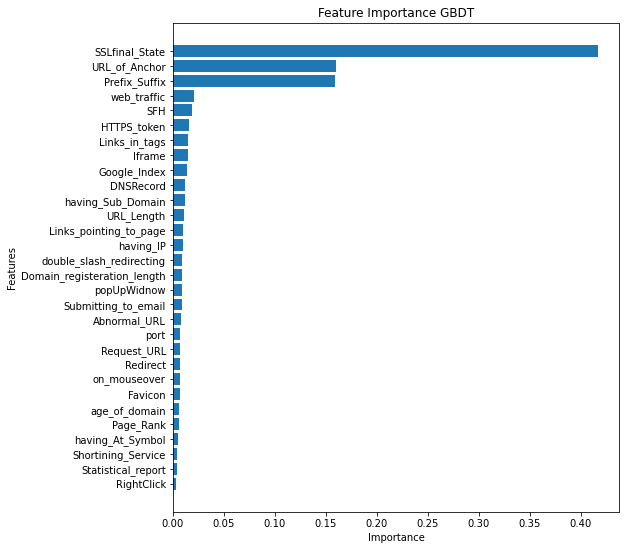

In [31]:
# gbdt feature importance 
fig = plt.figure(figsize = (8,9))
plt.barh(np.array(feature_names)[ordered_idx], sorted(gbdt.feature_importances_))
plt.ylabel('Features')
plt.xlabel('Importance')
plt.title('Feature Importance GBDT')

In [32]:
# creating submission data frame
submission_file = pd.DataFrame()
submission_file['key'] = test['key']
submission_file['Result'] = gbdt_test_pred

In [33]:
submission_file.head(10)

,key,Result
0,21338,1
1,21339,-1
2,21340,-1
3,21341,-1
4,21342,1
5,21343,1
6,21344,1
7,21345,1
8,21346,1
9,21347,-1


In [34]:
# saving the submission file in csv format
submission_file.to_csv('Phishing_Submission_File.csv', index = False)